<h1><center> Análise de pellets plásticos como ferramenta para o estudo de permanência de microplásticos em praias arenosas. </center></h1>

Juana Gerevini Bozzetto

## 04. Extraindo histograma imagens "filtradas"

- 3 imagens utilizadas: original, img_filtro_tent2 e img_filtro_tent5
- Extração do histograma de cores
- 3 opções para extração do histograma: 

>**Opção 1:** Matplotlib 

>**Opção 2:** Scikit-Image 

>**Opção 3:** Scikit-Image

In [13]:
#--- Bibliotecas utilizadas na rotina ---#

import skimage
import matplotlib.pyplot as plt
import os
import numpy as np

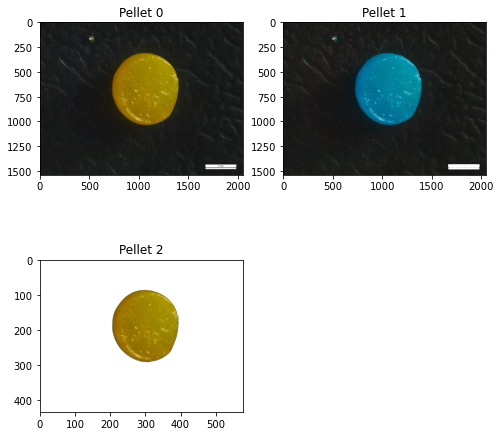

In [14]:
#--- Abrindo o arquivo jpg ---#
from skimage import io #io é parte do skimage

#--- Imagens para teste ---#

#Pellet 0: Pellet Amarelo Claro
pellet_a = io.imread('/home/jbozz/Documentos/lapogeo_ufsc/TCC/notebooks/fotos_pellets_cp/cl1_p1_psul_deixa1_g0005.jpg')

#Pellet 1: Pellet Amarelo Claro Filtrado
pellet_b = io.imread('/home/jbozz/Documentos/lapogeo_ufsc/TCC/notebooks/fotos_pellets_cp/rotina_03_tentativa2.png')

#Pellet 2: Pellet Filtrado por: https://www.remove.bg/pt-br
pellet_c = io.imread('/home/jbozz/Documentos/lapogeo_ufsc/TCC/notebooks/fotos_pellets_cp/rotina_03_tentativa5a.png')

images = [pellet_a, pellet_b, pellet_c]

#--- Mostrar Imagens ---#
plt.figure(figsize=(8,8)) # definindo tamanho da imagem

for i in range(3):
    plt.subplot(2,2,i+1)    # número de imagens no grid (x,y) x = linha, y= coluna
    plt.imshow(images[i])
    plt.title('Pellet %i'%i)

plt.show()

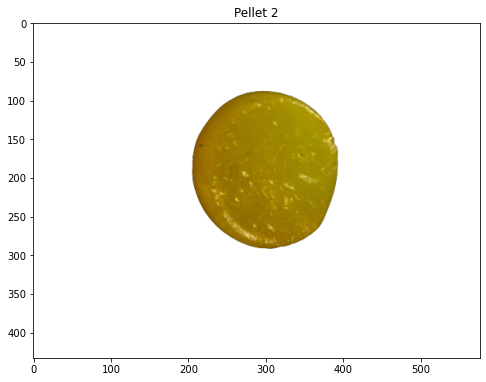

Tamanho da imagem antes: (433, 577, 4)
Tipo de imagem antes: uint8
Tamanho da imagem depois: (433, 577, 3)
Tipo de imagem depois: uint8


In [15]:
#Pellet 2: Pellet Filtrado

#--- Mostrar Imagens ---#
plt.figure(figsize=(8,8)) # definindo tamanho da imagem
plt.imshow(pellet_c)
plt.title('Pellet 2')
plt.show()

print("Tamanho da imagem antes: {}".format(pellet_c.shape)) 
print("Tipo de imagem antes: {}".format(pellet_c.dtype))

#--- Transformando a imagem de ARGB para RGB---#
#Number of Channels represents the number of components used to represent each pixel.
#Number of Channels = 4 represent Alpha, Red, Green and Blue channels.

import cv2
import numpy as np

pellet_c = cv2.cvtColor(pellet_c, cv2.COLOR_BGRA2BGR)

print("Tamanho da imagem depois: {}".format(pellet_c.shape)) 
print("Tipo de imagem depois: {}".format(pellet_c.dtype))

#lista das imagens retificada
images = [pellet_a, pellet_b, pellet_c]

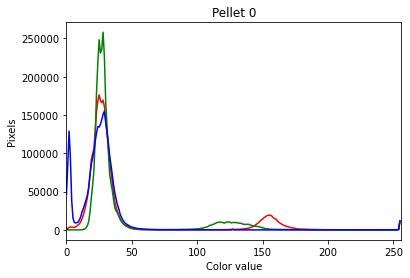

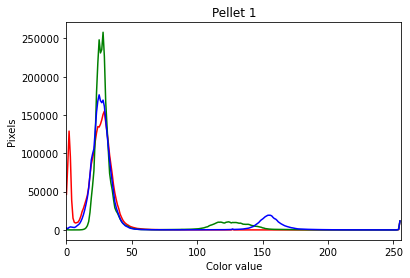

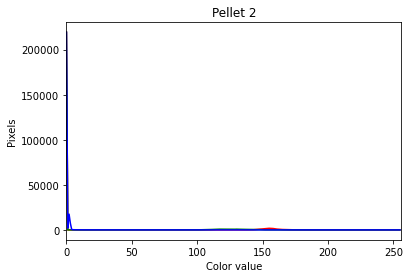

In [16]:
#--- Histograma de Cores - Matplotlib - Opção 1---#

# Tupla para selecionar as cores de cada canal 
colors = ("red", "green", "blue")
channel_ids = (0, 1, 2)

# Histrograma com as três linhas, uma para cada cor
i = 0
for foto in images:
    plt.xlim([0, 256])
    for channel_id, c in zip(channel_ids, colors):
        histogram, bin_edges = np.histogram(
            foto[:, :, channel_id], bins=256, range=(0, 256)
        )
        plt.plot(bin_edges[0:-1], histogram, color=c)
    plt.xlim((0, 256))
    plt.xlabel("Color value")
    plt.ylabel("Pixels")
    plt.title('Pellet %i' %i)
    i+=1
    plt.show()

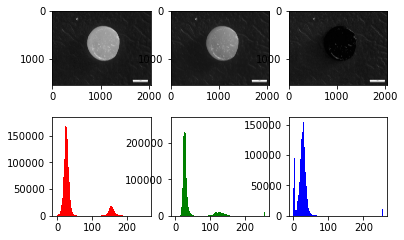

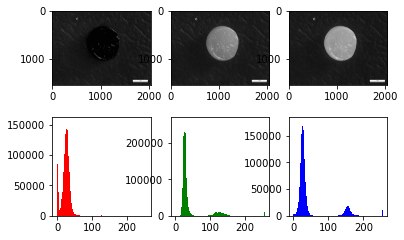

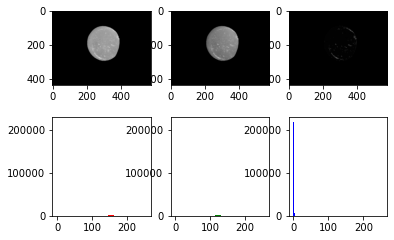

In [17]:
#--- Histograma de Cores - Scikit Image - Opção 2---#

import numpy as np
import skimage
import matplotlib.pyplot as plt

for foto in images:
    image = foto
    image_red, image_green, image_blue = image[:,:,0], image[:,:,1], image[:,:,2]
 
    fig, ax = plt.subplots(2,3)
    ax[0,0].imshow(image_red, cmap='gray')
    ax[0,1].imshow(image_green, cmap='gray')
    ax[0,2].imshow(image_blue, cmap='gray')
      
    bins = np.arange(-0.5, 255+1,1)
    ax[1,0].hist(image_red.flatten(), bins = bins, color='r')
    ax[1,1].hist(image_green.flatten(), bins=bins, color='g')
    ax[1,2].hist(image_blue.flatten(), bins=bins, color='b')
    
#não consegui definir os limites para os gráficos para melhor comparação
#nem colocar título

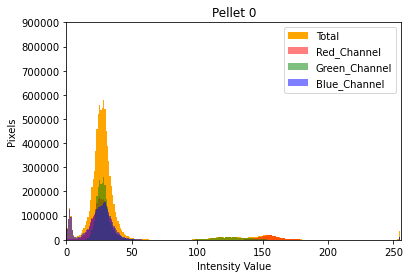

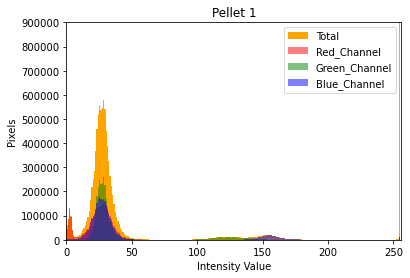

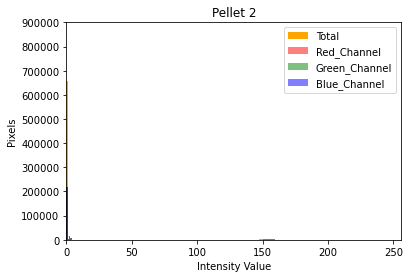

In [18]:
#--- Histograma de cores - Scikit Image - Opção 3 ---#

from skimage import io
import matplotlib.pyplot as plt

i = 0
for foto in images:
    _ = plt.hist(foto.ravel(), bins = 256, color = 'orange', )
    _ = plt.hist(foto[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
    _ = plt.hist(foto[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
    _ = plt.hist(foto[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
    _ = plt.ylim((0, 900000))
    _ = plt.xlim((0, 256))
    _ = plt.xlabel('Intensity Value')
    _ = plt.ylabel('Pixels')
    _ = plt.legend(['Total', 'Red_Channel', 'Green_Channel', 'Blue_Channel'])
    _ = plt.title('Pellet %i' %i)
    i+=1
    plt.show()

In [19]:
#Descobrir como obter os dados das imagens (dados das análises do histograma)
#Fazer filtro do fundo